In [10]:
import shap
import joblib
import numpy as np
import pandas as pd
import pickle
from catboost import CatBoostRegressor, Pool
import matplotlib.pyplot as plt
shap.initjs() 

In [2]:
columns = ['global_trend', 'V0_temperature_c_surface_avg', 'V0_temperature_c_surface_max', 'V0_temperature_c_surface_min', 
           'V0_mean_cvi', 'V0_std_cvi', 'V0_median_cvi', 'V0_q10_cvi', 'V0_q25_cvi', 'V0_q75_cvi', 'V0_q90_cvi',
           'V0_mean_cab', 'V0_std_cab', 'V0_median_cab', 'V0_q10_cab', 'V0_q25_cab', 'V0_q75_cab', 'V0_q90_cab',
           'V0_mean_ecnorm', 'V0_std_ecnorm', 'V0_median_ecnorm', 'V0_q10_ecnorm', 'V0_q25_ecnorm', 'V0_q75_ecnorm', 'V0_q90_ecnorm',
           'V0_mean_evi2', 'V0_std_evi2', 'V0_median_evi2', 'V0_q10_evi2', 'V0_q25_evi2', 'V0_q75_evi2', 'V0_q90_evi2',
           'V0_mean_gndvi', 'V0_std_gndvi', 'V0_median_gndvi', 'V0_q10_gndvi', 'V0_q25_gndvi', 'V0_q75_gndvi', 'V0_q90_gndvi',
           'V0_mean_gvmi', 'V0_std_gvmi', 'V0_median_gvmi', 'V0_q10_gvmi', 'V0_q25_gvmi', 'V0_q75_gvmi', 'V0_q90_gvmi',
           'V0_mean_lai', 'V0_std_lai', 'V0_median_lai', 'V0_q10_lai', 'V0_q25_lai', 'V0_q75_lai', 'V0_q90_lai',
           'V0_mean_mcari', 'V0_std_mcari', 'V0_median_mcari', 'V0_q10_mcari', 'V0_q25_mcari', 'V0_q75_mcari', 'V0_q90_mcari',
           'V0_mean_msavi', 'V0_std_msavi', 'V0_median_msavi', 'V0_q10_msavi', 'V0_q25_msavi', 'V0_q75_msavi', 'V0_q90_msavi',
           'V0_mean_nddi', 'V0_std_nddi', 'V0_median_nddi', 'V0_q10_nddi', 'V0_q25_nddi', 'V0_q75_nddi', 'V0_q90_nddi',
           'V0_mean_ndvi', 'V0_std_ndvi', 'V0_median_ndvi', 'V0_q10_ndvi', 'V0_q25_ndvi', 'V0_q75_ndvi', 'V0_q90_ndvi',
           'V0_mean_ndwi', 'V0_std_ndwi', 'V0_median_ndwi', 'V0_q10_ndwi', 'V0_q25_ndwi', 'V0_q75_ndwi', 'V0_q90_ndwi',
           'V0_mean_pvi', 'V0_std_pvi', 'V0_median_pvi', 'V0_q10_pvi', 'V0_q25_pvi', 'V0_q75_pvi', 'V0_q90_pvi',
           'V0_mean_slavi', 'V0_std_slavi', 'V0_median_slavi', 'V0_q10_slavi', 'V0_q25_slavi', 'V0_q75_slavi', 'V0_q90_slavi',
           'V0_mean_vsdi', 'V0_std_vsdi', 'V0_median_vsdi', 'V0_q10_vsdi', 'V0_q25_vsdi', 'V0_q75_vsdi', 'V0_q90_vsdi',
           'V0_mean_wet', 'V0_std_wet', 'V0_median_wet', 'V0_q10_wet', 'V0_q25_wet', 'V0_q75_wet', 'V0_q90_wet',
           'V0_mean_fapar', 'V0_std_fapar', 'V0_median_fapar', 'V0_q10_fapar', 'V0_q25_fapar', 'V0_q75_fapar', 'V0_q90_fapar'
          ]

In [3]:
df = pd.read_csv("../data/test/test.csv")
df = df.drop(columns, axis=1)

In [4]:
df.head()

,year,variety_name2,yield,relative_maturity_2,soil_type_2,previous_crop_2,irrigation,bd_0_5,bd_100_200,bd_15_30,...,V0_soil_temperature_c_28_100_cm_down_min,V0_temperature_c_2_m_above_gnd_avg,V0_temperature_c_2_m_above_gnd_max,V0_temperature_c_2_m_above_gnd_min,V0_temperature_c_2_m_above_gnd_avg_halfday_0000,V0_temperature_c_2_m_above_gnd_avg_halfday_1200,V0_wind_speed_km_per_h_2_m_above_gnd_avg,V0_wind_speed_km_per_h_2_m_above_gnd_max,V0_wind_speed_km_per_h_2_m_above_gnd_min,V0_gdd
0,2020,G06Q68-5222 Brand,215.0,106.0,medium,Corn,Irrigated,1.283099,1.335382,1.333535,...,15.041650,18.836130,26.392576,11.637762,18.640317,23.339853,12.276001,22.570543,1.708724,16.996542
1,2020,G12S75-5122 Brand,194.0,112.0,medium,Soybean,None,1.305010,1.291618,1.318974,...,11.490662,14.174230,28.468813,3.975287,14.010452,17.941138,9.663607,22.981693,1.219140,11.193244
2,2020,G12S75-5122 Brand,222.0,112.0,medium,Corn,Irrigated,1.283099,1.335382,1.333535,...,15.041650,18.836130,26.392576,11.637762,18.640317,23.339853,12.276001,22.570543,1.708724,16.996542
3,2020,G16K01-3111 Brand,151.5,116.0,medium,rare,None,1.528379,1.601055,1.578878,...,11.180132,16.021449,26.557137,6.089927,15.865221,19.614704,9.671297,24.412659,1.716957,13.060961
4,2020,G12U17-3120 Brand,218.0,112.0,medium,Corn,Irrigated,1.283099,1.335382,1.333535,...,15.041650,18.836130,26.392576,11.637762,18.640317,23.339853,12.276001,22.570543,1.708724,16.996542


In [5]:
df.irrigation.unique()

array(['Irrigated', 'None'], dtype=object)

In [6]:
X_test = df.drop(['yield'], axis=1)
y_test = df['yield']

categorical_features_indices = np.where((X_test.dtypes != float) & (X_test.dtypes != int))[0]
cat_cols = list(X_test.columns[categorical_features_indices])
pool_test = Pool(X_test, y_test, cat_features = cat_cols)

In [7]:
X_test.loc[:, cat_cols]

,variety_name2,soil_type_2,previous_crop_2,irrigation
0,G06Q68-5222 Brand,medium,Corn,Irrigated
1,G12S75-5122 Brand,medium,Soybean,None
2,G12S75-5122 Brand,medium,Corn,Irrigated
3,G16K01-3111 Brand,medium,rare,None
4,G12U17-3120 Brand,medium,Corn,Irrigated
...,...,...,...,...
6225,P1359AM,moderately_fine,Soybean,None
6226,P1359AM,medium,Soybean,None
6227,P1359AM,medium,Soybean,None
6228,P0977AM,medium,Soybean,None


In [13]:
# open a file, where you stored the pickled data
data = joblib.load('../sagemaker/output/intermediate/artifacts/model.joblib', 'rb')
# dump information to that file
model = data["model"]


In [14]:
# model = CatBoostRegressor().load_model('../model/model')

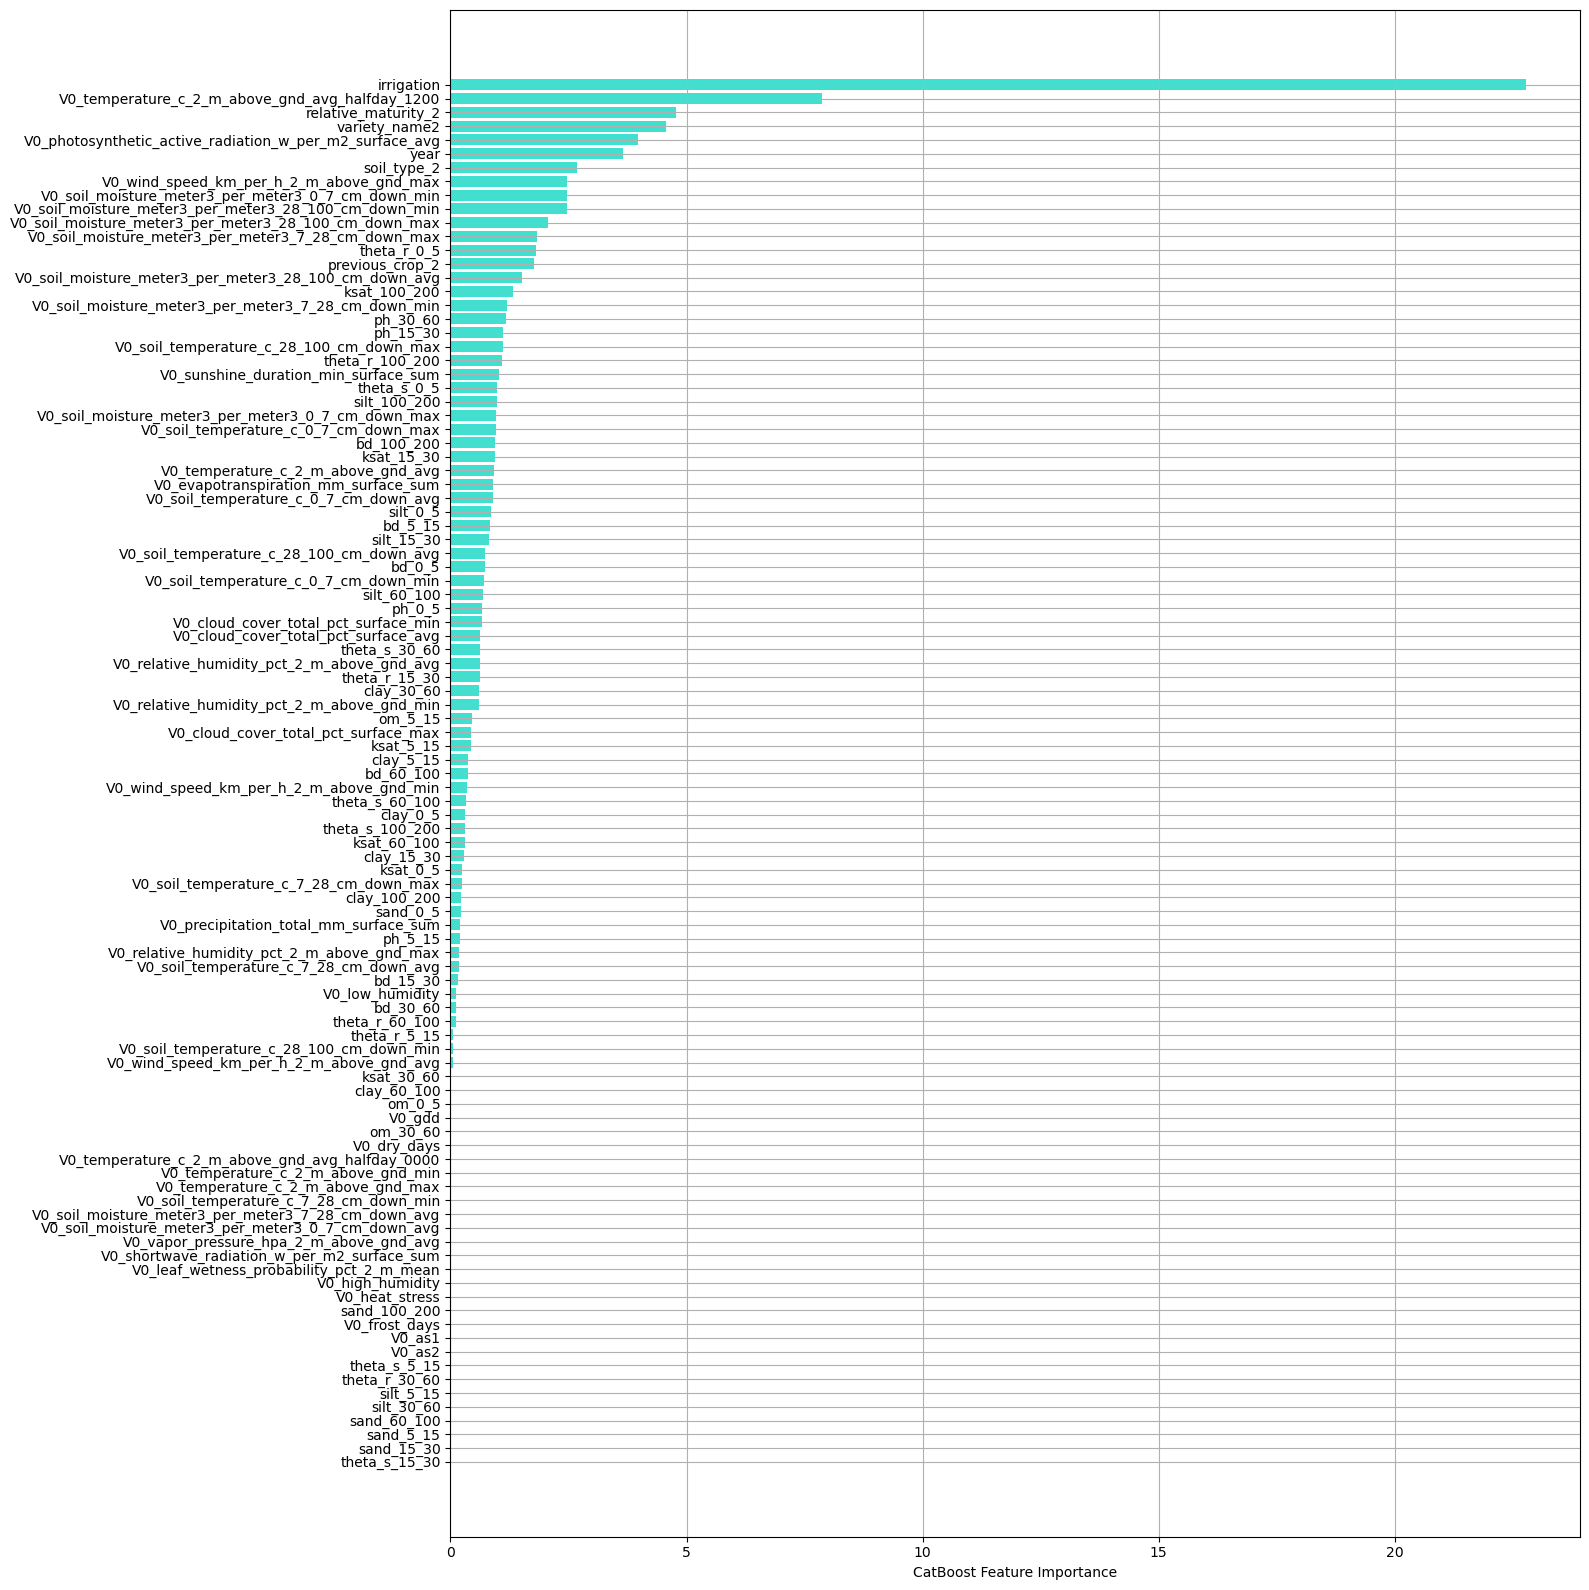

In [15]:
sorted_feature_importance = model.feature_importances_.argsort()

plt.figure(figsize=(16,16))
plt.barh(X_test.columns[sorted_feature_importance], 
        model.feature_importances_[sorted_feature_importance], 
        color='turquoise')
plt.xlabel("CatBoost Feature Importance")
plt.grid(which="both")
plt.tight_layout()

In [21]:
shap_values = model.get_feature_importance(pool_test, type='ShapValues')

expected_value = shap_values[0,-1]
shap_values = shap_values[:,:-1]

# visualize the first prediction's explanation
shap.force_plot(expected_value, shap_values[0,:], X_test.iloc[0,:])
# shap.force_plot(expected_value, shap_values, X_test)

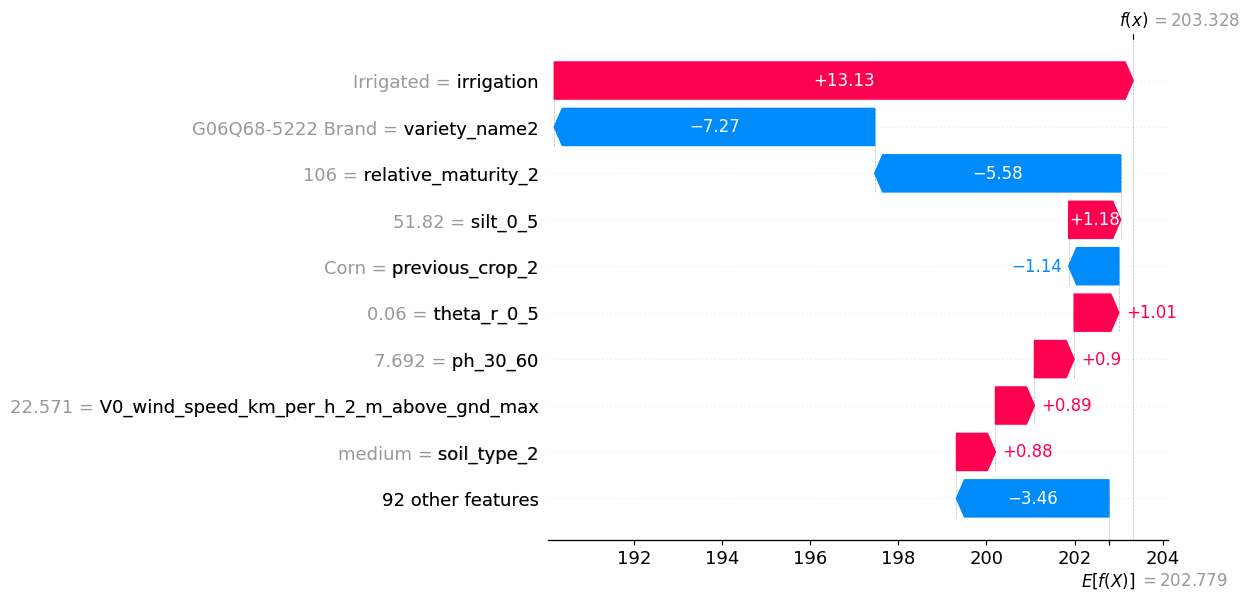

In [22]:
explainer = shap.TreeExplainer(model)
shap_values = explainer(X_test, y_test)

# visualize the first prediction's explanation
shap.plots.waterfall(shap_values[0])

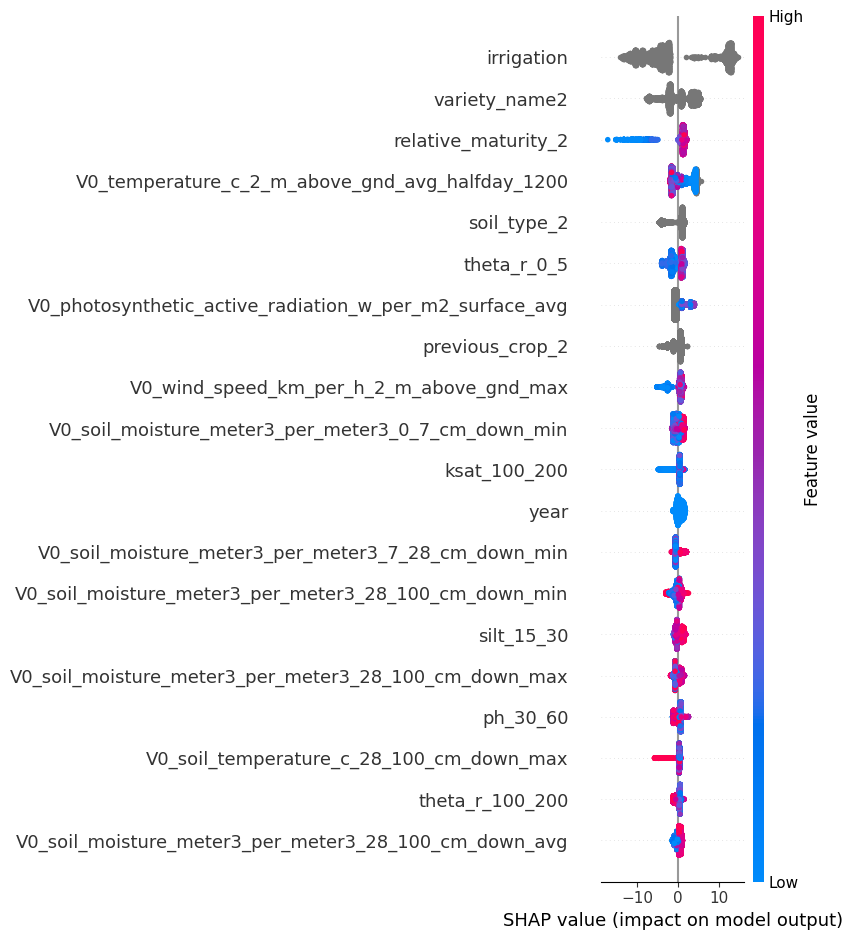

In [13]:
shap.summary_plot(shap_values, X_test)

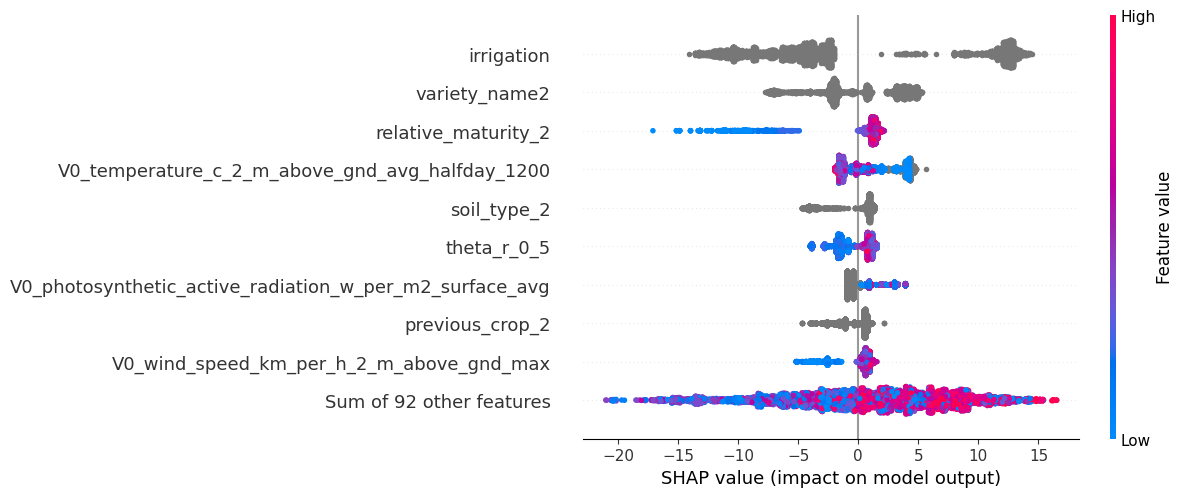

In [23]:
shap.plots.beeswarm(shap_values)

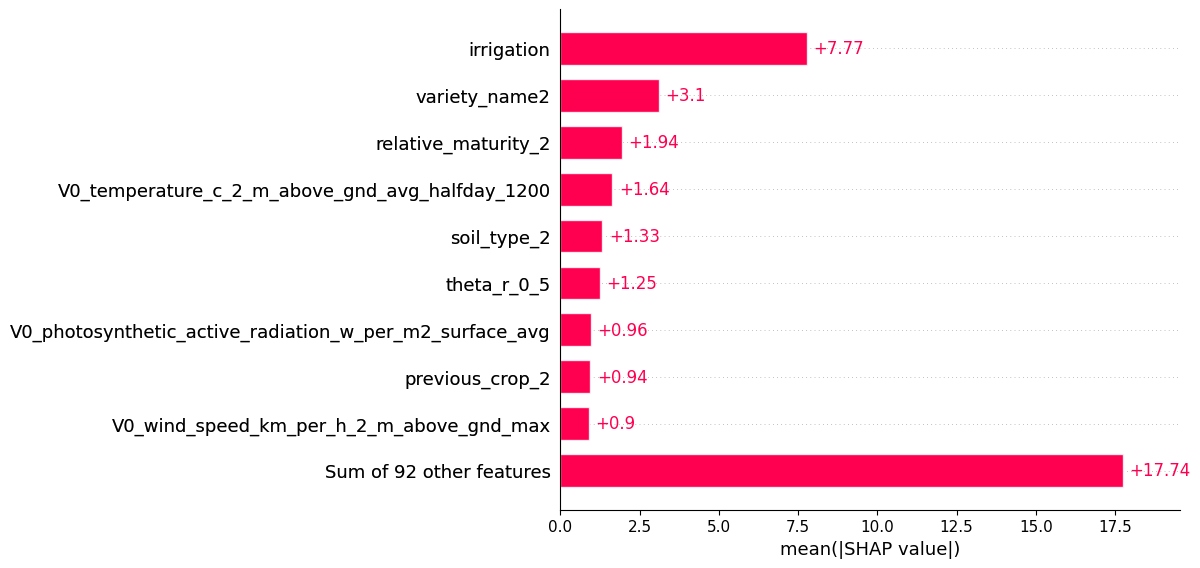

In [24]:
shap.plots.bar(shap_values)

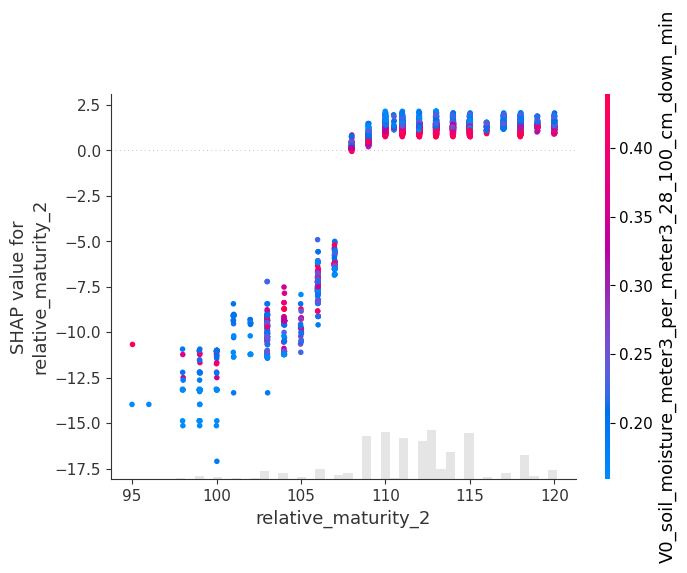

In [55]:
shap.plots.scatter(shap_values[:, "relative_maturity_2"], color=shap_values)

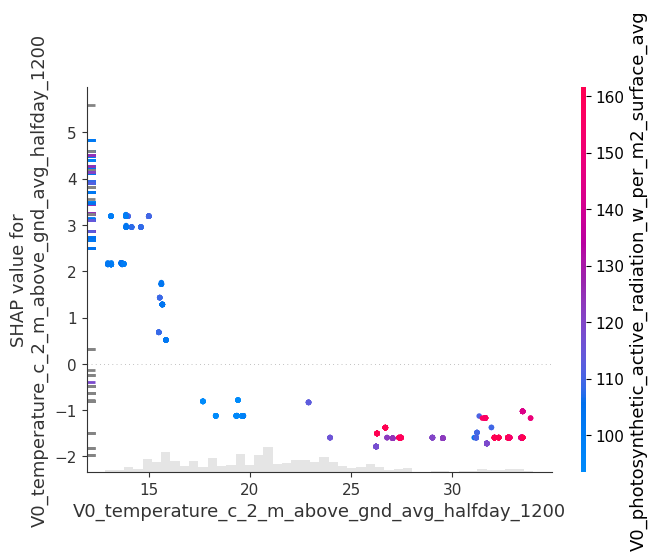

In [59]:
shap.plots.scatter(shap_values[:, "V0_temperature_c_2_m_above_gnd_avg_halfday_1200"], color=shap_values)